In [1]:
#Importing Libraries
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy.stats import norm
from utility import Univariate

In [2]:
#Reading Dataset
dataset = pd.read_csv("Placement.csv")
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [3]:
#Checking the Dataset Info
warnings.filterwarnings("ignore")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [4]:
#Splitting Quantitative and Qualitative columns
obj = Univariate()
qual, quan = obj.qualQuan(dataset)
print(qual)
print(quan)

['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']


In [5]:
#Finding Mean, Median, Mode
tble = obj.getUnivarateTbl(dataset,quan)
tble

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108.0,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
Median,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Mode,1,62.0,63.0,65.0,60.0,56.7,300000.0
Q1:25%,54.5,60.6,60.9,61.0,60.0,57.945,240000.0
Q2:50%,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Q3:75%,161.5,75.7,73.0,72.0,83.5,66.255,300000.0
Q4:100%,215.0,89.4,97.7,91.0,98.0,77.89,940000.0
IQR,107.0,15.1,12.1,11.0,23.5,8.31,60000.0
1.5Rule,160.5,22.65,18.15,16.5,35.25,12.465,90000.0
Lesser,-106.0,37.95,42.75,44.5,24.75,45.48,150000.0


In [6]:
#To Drop the Row from the datafram
#tble.drop(index = ["Q1:25%","Q1:50%","Q1:75%","Q1:100%"])

In [7]:
#Finding Outliers
lesser_outlier = []
greater_outlier = []
for column in quan:
    if tble[column]["Minimum"] < tble[column]["Lesser"] :
        lesser_outlier.append(column)
    
    if tble[column]["Maximum"] > tble[column]["Greater"]:
        greater_outlier.append(column)     

print(lesser_outlier)
print(greater_outlier)

['hsc_p']
['hsc_p', 'degree_p', 'salary']


In [8]:
#Removing the Outliers by replacing the lesser and greater values
for column in lesser_outlier:
    dataset[column][dataset[column] < tble[column]["Lesser"]] = tble[column]["Lesser"]

for column in greater_outlier:
    dataset[column][dataset[column] > tble[column]["Greater"]] = tble[column]["Greater"]


Cross Checking once, After the outliers were replaced

In [10]:
#Finding Mean, Median, Mode
tble = obj.getUnivarateTbl(dataset,quan)
tble

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108.0,67.303395,66.334744,66.358558,72.100558,62.278186,277648.648649
Median,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Mode,1,62.0,63.0,65.0,60.0,56.7,300000.0
Q1:25%,54.5,60.6,60.9,61.0,60.0,57.945,240000.0
Q2:50%,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Q3:75%,161.5,75.7,73.0,72.0,83.5,66.255,300000.0
Q4:100%,215.0,89.4,91.15,88.5,98.0,77.89,390000.0
IQR,107.0,15.1,12.1,11.0,23.5,8.31,60000.0
1.5Rule,160.5,22.65,18.15,16.5,35.25,12.465,90000.0
Lesser,-106.0,37.95,42.75,44.5,24.75,45.48,150000.0


In [11]:
#Checking Outliers
lesser_outlier = []
greater_outlier = []
for column in quan:
    if tble[column]["Minimum"] < tble[column]["Lesser"] :
        lesser_outlier.append(column)
    
    if tble[column]["Maximum"] > tble[column]["Greater"]:
        greater_outlier.append(column)
     

print(lesser_outlier)
print(greater_outlier)

[]
[]


In [12]:
#To Find the Frequency
frequency_tble_ = obj.getFrequencyTble(dataset,"hsc_p")
frequency_tble_

,UniqueValues,Frequency,RelativeFrequency,CummulativeFrequency
0,63.00,14,0.065116,0.065116
1,62.00,12,0.055814,0.120930
2,60.00,9,0.041860,0.162791
3,67.00,9,0.041860,0.204651
4,70.00,8,0.037209,0.241860
...,...,...,...,...
86,70.29,1,0.004651,0.981395
87,83.83,1,0.004651,0.986047
88,70.40,1,0.004651,0.990698
89,90.90,1,0.004651,0.995349


In [13]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [14]:
#Data Preprocessing
dataset["salary"].fillna(0,inplace = True)
dataset.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [15]:
#pip install seaborn

<Axes: xlabel='ssc_p', ylabel='Density'>

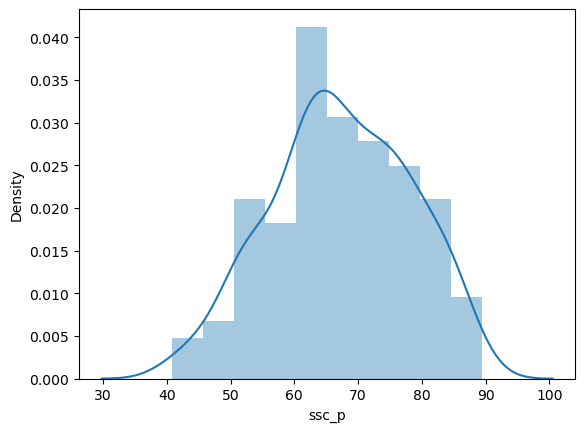

In [16]:
#Plotting the Dataset
import seaborn as sns
sns.distplot(dataset["ssc_p"])


Mean : 67.3, Standard Deviation : 10.83
The Area Between the range 40 and 60 : 0.13


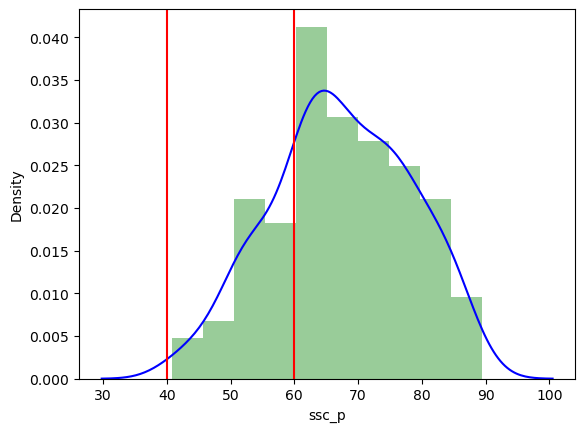

In [17]:
#Finding Mean, Std, Probs
mean,std,probs = obj.getPdfProbs(dataset["ssc_p"],40,60)
print(f"Mean : {mean}, Standard Deviation : {std}\nThe Area Between the range 40 and 60 : {probs}")

In [18]:
#PDF
#!pip install statsmodels

In [19]:
#Finding CDF
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(dataset["ssc_p"])
print(f"{round(ecdf(50),2)}")

0.06


<Axes: ylabel='Density'>

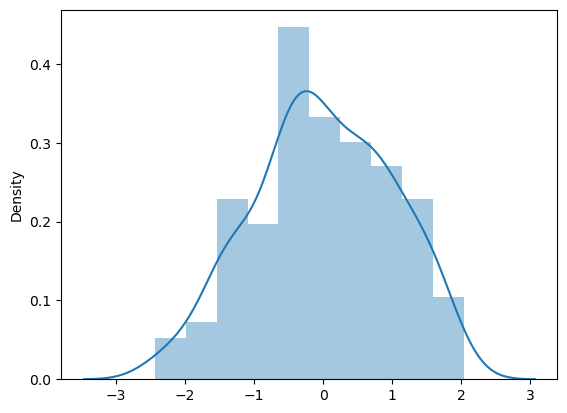

In [20]:
#Converting to Standard Normal Distribution
z_score = obj.convert_to_Std_NB(dataset["ssc_p"])
sns.distplot(z_score)